## 🔰*========== Classification Overview ==========*🔰

  * Entities/processes can be grouped into **sets** associated with a **label** known as a **Class**.
  * An entity/process that is associated with a particular label is said to: *belong* to the set of that Class. 
  * **Classes** can be grouped together into a **super set** defining a **Feature**.
    * Generally, an entity/process is exclusively assigned a single label within a feature set. 
  * Classification Problems depend on the **cardinality** of the feature set & the number of features.
    * Single Feature:
      * Cardinality 2:  Binary classification
      * Cardinality 3+: Multiclass classification
    * Multiple Feature: Multilabel classification

  * Features of **cardinality 1** within a dataset are dropped since they **contain no information**. 

  
### Example: 
Tools in an image can be assigned labels:
  <br>&emsp; *power-tool, hand-tool, drill, saw, sander*

These labels can be grouped into 2 Feature sets:
<br>&emsp;* **power-level:** {power-tool, hand-tool}
<br>&emsp;* **type:** {drill, saw, sander}
<br>
<br>
Classification: <br>
**Binary Class:** power-level <br>
**Multiclass:** type<br>
**Multilabel:** power-level & type

## 🔰*========== Summary Overview ==========*🔰

Steps:
1. Create a toy classification dataset using [Make_Circles]("https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html") 

2. Build a simple TF model, starting small and slowly increasing complexity.
  *   Model will perform poorly (Accuracy ~50%) due to non-linearity.
  *   Solutions to remediate the issue: 
      * Increase model depth & width.
      * Visualize decision boundary.
      * Change activation function from Linear -> Sigmoid.
  *   Model will perform well (Accuracy > 97%) with non-linear capability.

3. Improve Convergence Time:
  * Model will take 1000 epochs to converge to solution.
  * Create a learning rate callback to use during fitting.
  * Plot Loss vs Learning Rate to visualize relationship.
  * Based on findings use a more optimal learning rate as a starting point. 

4. Visualize Confusion Matrix
  * sklearn Confusion Matrix is returned as a numpy array.
  * create a custom function to present the CM in a visually appealing way.



## 🔰*========== Getting Started ==========*🔰


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.datasets import make_circles
from tensorflow.keras.utils import plot_model

In [52]:
#@title Helper Functions: Show_Model, Training_Plot, Visualize, BuildCompileFit, ContinueTraining
#---------------Build some helper functions:
def Show_Model(model):
    """
      Will provide a visual representation of model,
      showing layers, and input/output shapes. 
    """
    file_name = f'{model.name}.png'
    plot = plot_model(model,
                      to_file=file_name,
                      show_layer_activations=True,
                      show_shapes=True)
    
    image = mpimg.imread(file_name)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])  

def Training_Plot(history):
  """
    Will plot results from model training:
      loss,accuracy vs epochs
  """
  pd.DataFrame(history.history).plot(figsize=(10,6))
  plt.ylabel('loss')
  plt.xlabel('epochs')  

def Visualize_Data(x,y):
  """
    Will be used to show the pattern of data
  """
  #--- Create a DataFrame
  df = pd.DataFrame({'X0':x[:,0],
                    'X1':x[:,1],
                    'label':y})

  print(df['label'].value_counts(normalize=True)) 

  #--- Visualize Data:
  ax = df.plot(x='X0',
               y='X1',
               c='label',
               kind='scatter',
               cmap=plt.cm.RdYlBu,
               s=1,
               legend=True,
               figsize=(8,6))

def BuildCompileFit(Xdata,Ydata,layers,loss,optimizer,metrics,rndSeed,epochs,verbose=0,show_model=False):
  
  #--- Set Random Seed
  tf.random.set_seed(rndSeed)

  #--- Build Model
  layers2 = [tf.keras.layers.InputLayer(input_shape=(Xdata.shape[1],),
                                        name = 'InputLayer')]
  layers2.extend(layers)
  model = tf.keras.Sequential(layers2)

  #--- Compile Model
  model.compile(loss=loss,
                  optimizer=optimizer,
                  metrics=metrics)
  
  if show_model:
     Show_Model(model)

  #--- Fit Model:
  history=model.fit(Xdata,Ydata,epochs=epochs,verbose=verbose)


  #--- Evaluate Model
  print('\nEvaluation: ',model.evaluate(x,y),'\n')              

  #------------------View Loss/Training Curve:
  Training_Plot(history)

  return model


def ContinueTraining(Xdata,Ydata,model,epochs,verbose=0):

  #--- Fit Model:
  history=model.fit(Xdata,Ydata,epochs=epochs,verbose=verbose)

  #--- Evaluate Model
  print('\nEvaluation: ',model.evaluate(x,y),'\n')              

  #------------------View Loss/Training Curve:
  Training_Plot(history)

  return model  

In [2]:
#------------- Making a Practice Dataset:
n_samples = 1000

#---- Create Circles:
x,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state=123)

x.shape,y.shape

0    0.5
1    0.5
Name: label, dtype: float64


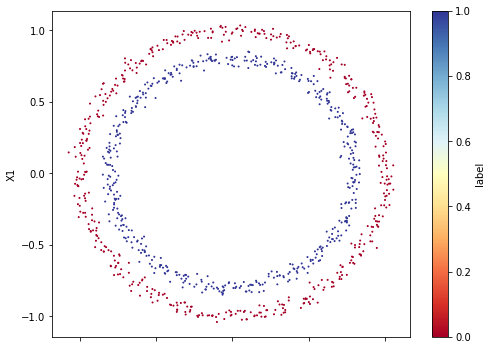

In [53]:
Visualize_Data(x,y)

## 🔰*========== Build a Simple Model ==========*🔰

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 4.8890 - accuracy: 0.4760
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 3.0771 - accuracy: 0.4730
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7685 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7125 - accuracy: 0.5020
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.4950

Evaluation:  [0.6966536045074463, 0.4950000047683716] 



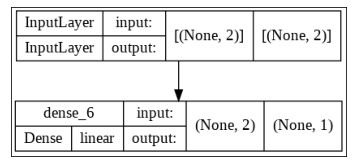

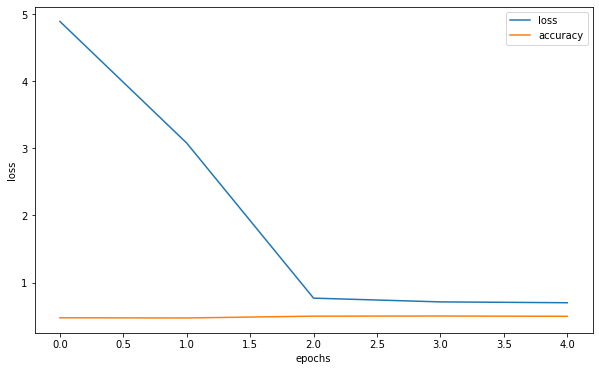

In [54]:
#--- Create Layers
layers = [tf.keras.layers.Dense(1)]


#--- Build, Compile, Fit, Evaluate:
model_1 = BuildCompileFit(Xdata=x,
                          Ydata=y,
                          layers=layers,
                          loss=tf.keras.losses.BinaryCrossentropy(),
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics=['accuracy'],
                          epochs=5,
                          rndSeed=123,
                          verbose=1,
                          show_model=True)

### ❌ Model's **accuracy is approximately 50%**, meaning it performs no better than **random guessing**. 

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5040

Evaluation:  [0.6932167410850525, 0.5040000081062317] 



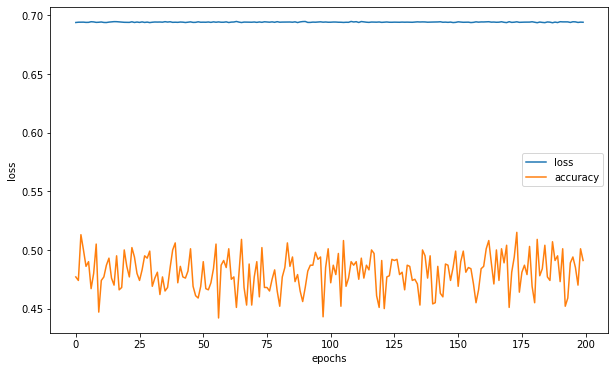

In [56]:
#--- Improve Model by training for longer:
model_1 = ContinueTraining(Xdata=x,
                           Ydata=y,
                           model=model_1,
                           epochs=200)

## 🔰*========== Improving the Model: ==========*🔰

32/32 [==============================] - 0s 1ms/step - loss: 7.2997 - accuracy: 0.5210

Evaluation:  [7.299702167510986, 0.5210000276565552] 



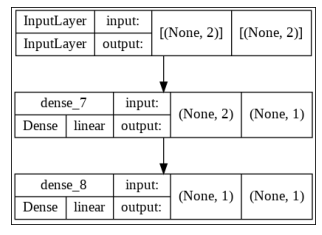

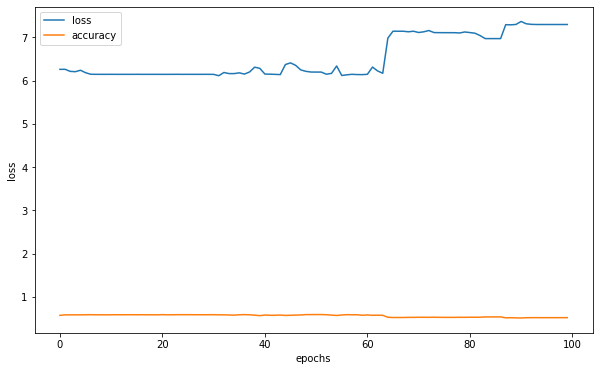

In [57]:
#--- --------------------------------------Improve Model by adding more layers:
#--- Create Layers
layers = [tf.keras.layers.Dense(1),
          tf.keras.layers.Dense(1)]

#--- Build, Compile, Fit, Evaluate:
model_2 = BuildCompileFit(Xdata=x,
                          Ydata=y,
                          layers=layers,
                          loss=tf.keras.losses.BinaryCrossentropy(),
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics=['accuracy'],
                          epochs=100,
                          rndSeed=123,
                          verbose=0,
                          show_model=True)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5010

Evaluation:  [0.693300724029541, 0.5009999871253967] 



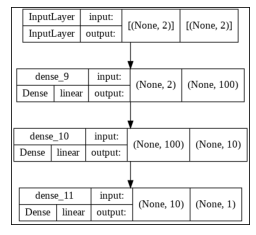

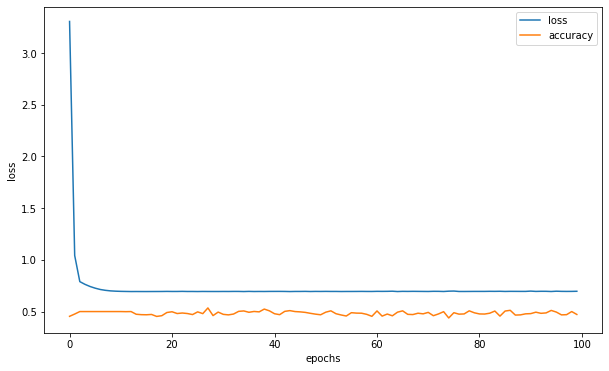

In [58]:
#---------------------------------- Improve Model by increasing the quantity and width of layers:

#--- Create Layers
layers = [tf.keras.layers.Dense(100),
          tf.keras.layers.Dense(10),
          tf.keras.layers.Dense(1)]

#--- Build, Compile, Fit, Evaluate:
model_2 = BuildCompileFit(Xdata=x,
                          Ydata=y,
                          layers=layers,
                          loss=tf.keras.losses.BinaryCrossentropy(),
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['accuracy'],
                          epochs=100,
                          rndSeed=123,
                          verbose=0,
                          show_model=True)

### ❗ Still No Improvement! Loss curve seems to level out near 15-20 epochs, so more training is unlikely to help. 

### 🔑 A more complex model may be needed

## 🔰*========== Investigate Poor Performance ==========*🔰

In [60]:
#@title Helper Function: plot_deision_boundary
#----- Start by Viewing the Decision Boundary:
def plot_decision_boundary(model,x,y,a=0.50):
  x_min,x_max = x[:,0].min() - 0.1, x[:,0].max() + 0.1
  y_min,y_max = x[:,1].min() - 0.1, x[:,1].max() + 0.1

  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))
  

  #--- Create X 'data'
  x_in = np.c_[xx.ravel(),yy.ravel()]  #Stack 2d arrays together
  
  #-- Predictions
  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print('binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  plt.figure(figsize=(6,6))
  plt.contourf(xx, yy, y_pred, cmap= plt.cm.RdYlBu, alpha = a)
  plt.scatter(x[:,0], x[:,1], c = y, s = 2, cmap= plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())  

binary classification


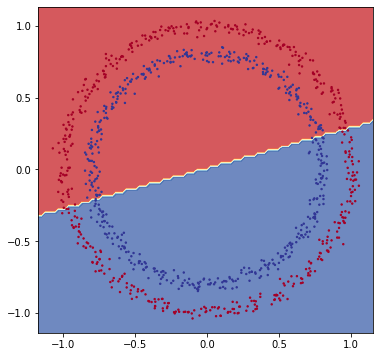

In [61]:
plot_decision_boundary(model=model_2,
                       x=x,
                       y=y,
                       a=0.75)

### 🔑 Model has trouble because the Decision Boundary is a straight line.
### &emsp; This is because the model is treating the data as a regression problem.

### 🔑 Non-linearity is required to solve this problem.

## 🔰*========== Implement Possible Solutions ==========*🔰

Simplify the model, and update the activation functions.<br>
[Sigmoid Activation]("https://deepai.org/machine-learning-glossary-and-terms/sigmoid-function")



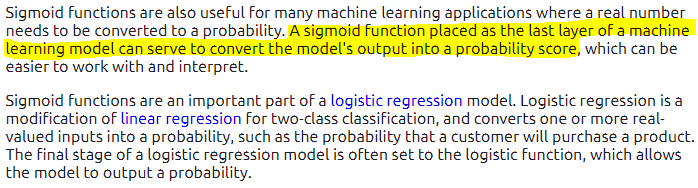

32/32 [==============================] - 0s 1ms/step - loss: 0.3505 - accuracy: 0.8600

Evaluation:  [0.3504974842071533, 0.8600000143051147] 



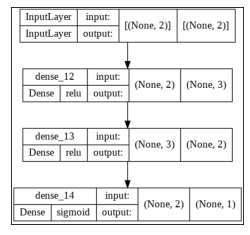

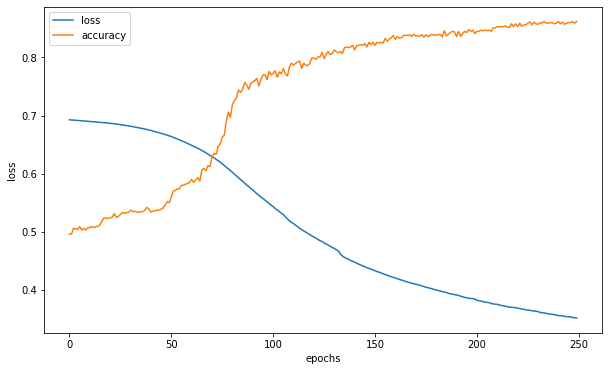

In [62]:
#--- Improve Model by updating the activation functions:

#--- Create Layers
layers = [tf.keras.layers.Dense(3,activation='relu'),      # <--- Simplify model
          tf.keras.layers.Dense(2,activation='relu'),      # <--- Multilayer for non-linearity
          tf.keras.layers.Dense(1,activation='sigmoid')]   # <--- Sigmoid

#--- Build, Compile, Fit, Evaluate:
model_3 = BuildCompileFit(Xdata=x,
                          Ydata=y,
                          layers=layers,
                          loss=tf.keras.losses.BinaryCrossentropy(),
                          optimizer=tf.keras.optimizers.Adam(learning_rate=10**-3),
                          metrics=['accuracy'],
                          epochs=250,
                          rndSeed=123,
                          verbose=0,
                          show_model=True)

binary classification


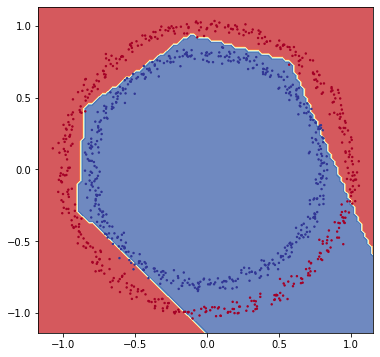

In [63]:
plot_decision_boundary(model=model_3,
                       x=x,
                       y=y,
                       a=0.75)

### ⚡ Finally some improvement!
The decision boundary is **no longer linear** (non-linear). <br>
The loss function also appears to have not flattened out. <br>
Additional improvement may be possible. 

32/32 [==============================] - 0s 1ms/step - loss: 0.0985 - accuracy: 0.9840

Evaluation:  [0.09853757917881012, 0.984000027179718] 



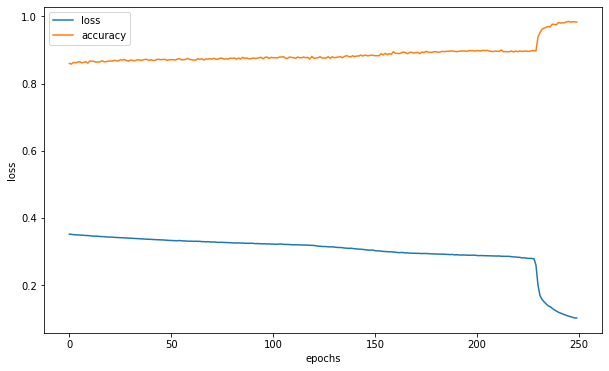

In [64]:
#----------------------------------Improve Model by training for longer:
model_3 = ContinueTraining(Xdata=x,
                           Ydata=y,
                           model=model_3,
                           epochs=250)

binary classification


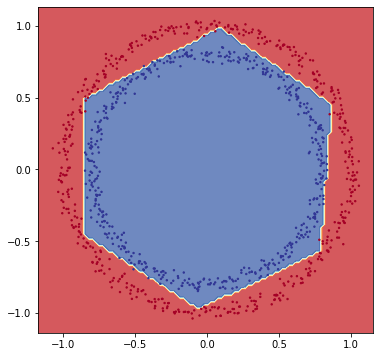

In [65]:
plot_decision_boundary(model=model_3,
                       x=x,
                       y=y,
                       a=0.75)

32/32 [==============================] - 0s 1ms/step - loss: 0.0319 - accuracy: 0.9920

Evaluation:  [0.031877823173999786, 0.9919999837875366] 



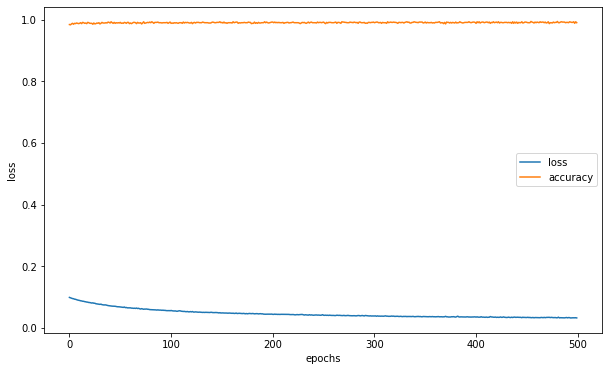

In [66]:
#------------- Train one last time to refine the model:
model_3 = ContinueTraining(Xdata=x,
                           Ydata=y,
                           model=model_3,
                           epochs=500)

binary classification


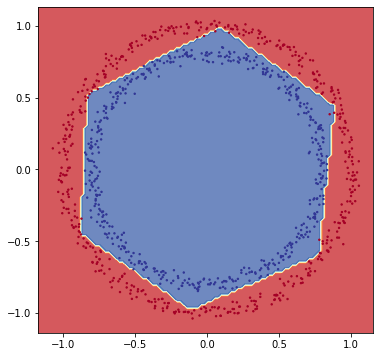

In [67]:
plot_decision_boundary(model=model_3,
                       x=x,
                       y=y,
                       a=0.75)

## 🔰*========== Improve Convergence Rate ==========*🔰
### To achieve the results above the model required training for 1000 total epochs.

### It may be possible to improve how quickly the loss converges to a minimum state.

## 🔑 Use a **Learning Rate Callback** to track loss vs learning rate.

In [68]:
#@title Update Helper Functions: BuildCompileFit, Continue Training
def BuildCompileFit(Xdata,Ydata,layers,loss,optimizer,callbacks,metrics,rndSeed,epochs,verbose=0,show_model=False):
  #--- Set Random Seed
  tf.random.set_seed(rndSeed)

  #--- Build Model
  layers2 = [tf.keras.layers.InputLayer(input_shape=(Xdata.shape[1],),
                                        name = 'InputLayer')]
  layers2.extend(layers)
  model = tf.keras.Sequential(layers2)

  #--- Compile Model
  model.compile(loss=loss,
                  optimizer=optimizer,
                  metrics=metrics)
  
  #--- Show Model
  if show_model:
    file_name = f'{model_1.name}.png'
    plot = plot_model(model,
                      to_file=file_name,
                      show_layer_activations=True,
                      show_shapes=True)
    
    image = mpimg.imread(file_name)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])  

  #--- Fit Model:
  history=model.fit(Xdata,Ydata,
                    epochs=epochs,
                    callbacks=callbacks,
                    verbose=verbose)



  #--- Evaluate Model
  print('\nEvaluation: ',model.evaluate(x,y),'\n')              

  #------------------View Loss/Training Curve:
  pd.DataFrame(history.history).plot()
  plt.ylabel('loss')
  plt.xlabel('epochs')

  return model,history


def ContinueTraining(Xdata,Ydata,model,callbacks,epochs,verbose=0):

  #--- Fit Model:
  history=model.fit(Xdata,Ydata,
                    epochs=epochs,
                    callbacks=callbacks,
                    verbose=verbose)

  #--- Evaluate Model
  print('\nEvaluation: ',model.evaluate(x,y),'\n')              

  #------------------View Loss/Training Curve:
  pd.DataFrame(history.history).plot()
  plt.ylabel('loss')
  plt.xlabel('epochs')

  return model 



In [75]:
#@title New Helper Function: Find_Optimal_LR
def Find_Optimal_LR(hist,offsetFactor):
  #----- Find the Optimal Learning Rate: 
  loss = np.array(hist.history['loss'])
  idx_of_min_loss = np.where(loss == loss.min())[0][0]
  best_lr = hist.history['lr'][idx_of_min_loss]
  optimal_lr = best_lr * offsetFactor

  print(f'Best LR: {best_lr:5.4f}')
  print(f'Optimal: {optimal_lr:5.4f}')
  #-------------------------- Loss vs Learning Rate Curve
  plt.figure(figsize=(10,6))
  plt.semilogx(hist.history['lr'],hist.history['loss'])

  #--- Learning Rate: 
  plt.axvline(x=best_lr,c='red',ls='--',lw=0.75,label='best')           #--Lowest point on loss curve
  plt.axvline(x=optimal_lr,c='orange',ls='--',lw=0.75,label='optimal')     #--Value to use for training

  plt.xlabel('Learning Rate')
  plt.ylabel('Loss')
  plt.legend()
  return optimal_lr

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000

Evaluation:  [0.6933488845825195, 0.5] 



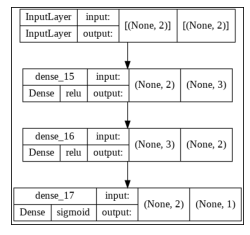

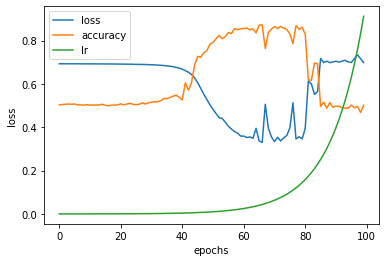

In [69]:
#--- Create Layers
layers = [tf.keras.layers.Dense(3,activation='relu'),      # <--- Simplify model
          tf.keras.layers.Dense(2,activation='relu'),      # <--- Multilayer for non-linearity
          tf.keras.layers.Dense(1,activation='sigmoid')]   # <--- Sigmoid

#--- Learning Rate Callback:
lr_scheduler = [tf.keras.callbacks.LearningRateScheduler(lambda epoch: 10**-4 * 10**(epoch/25))]

#--- Build, Compile, Fit, Evaluate:
model_4,hist4 = BuildCompileFit(Xdata=x,
                          Ydata=y,
                          layers=layers,
                          loss=tf.keras.losses.BinaryCrossentropy(),
                          optimizer=tf.keras.optimizers.Adam(learning_rate=10**-3),
                          metrics=['accuracy'],
                          callbacks=lr_scheduler,
                          epochs=100,
                          rndSeed=123,
                          verbose=0,
                          show_model=True)

## [Adam Optimizer]("https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/")
  * Adam Optimizer does not use a single learning rate. 
  * It is best to let the optimizer converge towards the best learning rate.
  * It is optimal to set the starting learning rate to some value just before the loss tapers off in the loss vs learning-rate plot.
  * an offset factor of 60% (empirically found) will be used for this purpose.

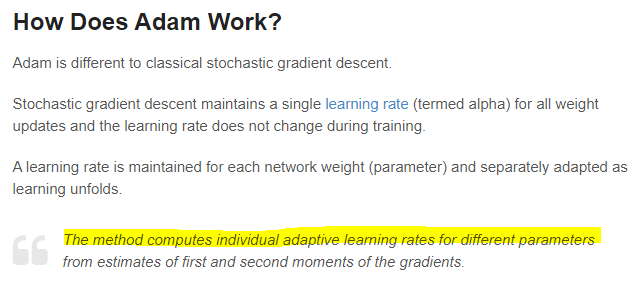

Best LR: 0.0437
Optimal: 0.0262


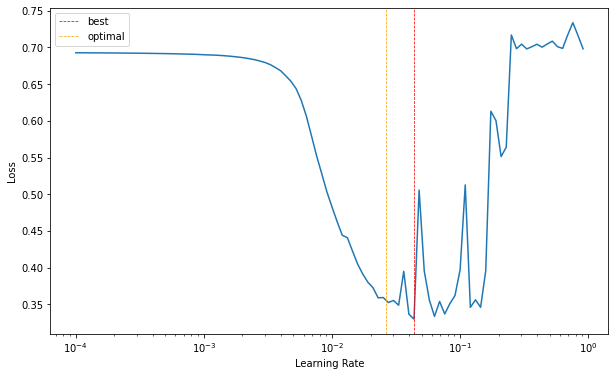

In [78]:
#---- Find the best learning rate, 60% offset used for optimal value to pass during training

optimal_lr = Find_Optimal_LR(hist=hist4,
                             offsetFactor=0.60)

32/32 [==============================] - 0s 2ms/step - loss: 0.0538 - accuracy: 0.9790

Evaluation:  [0.05380843207240105, 0.9789999723434448] 



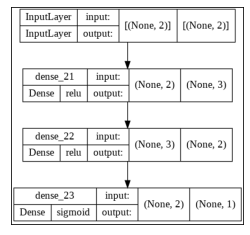

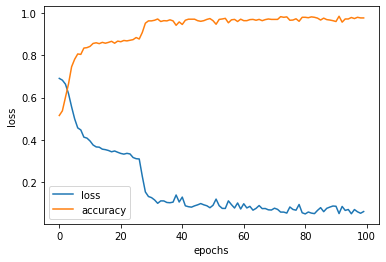

In [79]:
#----- Layers:
layers = [tf.keras.layers.Dense(3,activation='relu'),      # <--- Simplify model
          tf.keras.layers.Dense(2,activation='relu'),      # <--- Multilayer for non-linearity
          tf.keras.layers.Dense(1,activation='sigmoid')]   # <--- Sigmoid

#--- Build, Compile, Fit, Evaluate:
model_5,hist5 = BuildCompileFit(Xdata=x,
                          Ydata=y,
                          layers=layers,
                          loss=tf.keras.losses.BinaryCrossentropy(),
                          optimizer=tf.keras.optimizers.Adam(learning_rate=optimal_lr),
                          metrics=['accuracy'],
                          callbacks=None,
                          epochs=100,
                          rndSeed=123,
                          verbose=0,
                          show_model=True)

### ❕ The Model Converges much faster, reaching its peak at ~40-60 epochs

binary classification


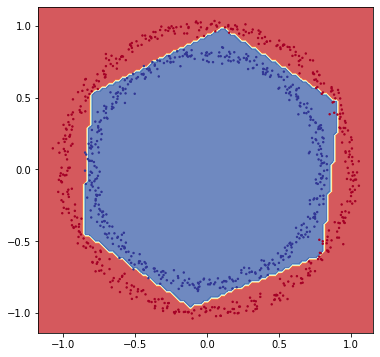

In [80]:
plot_decision_boundary(model=model_5,
                       x=x,
                       y=y,
                       a=0.75)

32/32 [==============================] - 0s 1ms/step - loss: 0.0456 - accuracy: 0.9820

Evaluation:  [0.04558652639389038, 0.9819999933242798] 



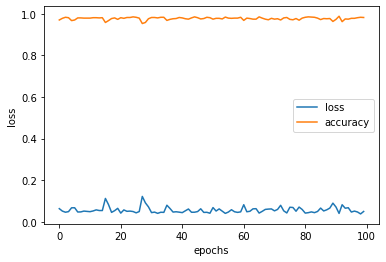

In [81]:
#------------- Train one last time to refine the model:
model_5 = ContinueTraining(Xdata=x,
                           Ydata=y,
                           model=model_5,
                           callbacks=None,
                           epochs=100)

binary classification


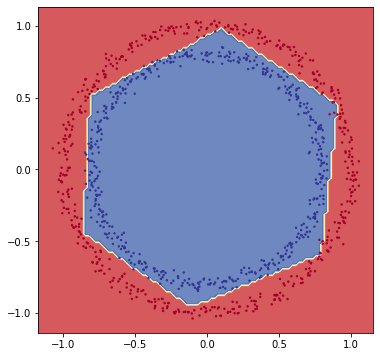

In [82]:
plot_decision_boundary(model=model_5,
                       x=x,
                       y=y,
                       a=0.75)

## ⚡ Model was able to converge well at 200 epochs, an 80% reduction in training time!

## 🔰*========== Evaluating Model Performance ==========*🔰


*   Accuracy
*   Precision
*   Recall
*   F1-Score
*   Confusion Matrix
*   Classification report (via Scikit-Learn)



In [164]:
from sklearn.metrics import confusion_matrix
from itertools import product

In [172]:
#@title Helper Functions: Plot_CM
def _Get_text_color(v_int,v_norm,thresh):
    """
      v_int: value as integer
      v_norm: normalized value (float)
      thresh: cutoff value for text color
    """
    v_pct = f"{v_norm*100:.1f}%"
    text = f"{v_int} ({v_pct})"
    color = 'white' if v_int > thresh else 'black'
    return text,color

def _Plot_Text(cm,cm_norm):
  """ 
    Will show confusion matrix values on
    confusion matrix plot, and will color by value.
  """
  #--- 
  x_range = range(cm.shape[0])
  y_range = range(cm.shape[1])

  #--- Set Color Thresholds:
  threshold = (cm.max()+cm.min())/2

  for x,y in product(x_range,y_range):
    text,color = _Get_text_color(v_int=cm[x,y],
                                 v_norm=cm_norm[x,y],
                                 thresh=threshold)
    plt.text(y,x,text,
             ha='center',  #horizontal alignment
             color = color,
             size=15)

def _Format_Fig(ax,n_labels):
    #--- Classes:
  classes = False
  labels = classes if classes else np.arange(n_labels) #cm.shape[0]

  ax.set(title='Confusion Matrix',
         xlabel='Predicted Labels',
         ylabel='True Labels',
         xticks=np.arange(n_labels),
         yticks=np.arange(n_labels),
         xticklabels=labels,
         yticklabels=labels)

  #--- Set x-axis labels to bottom:
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #--- Adjust label size:
  ax.xaxis.label.set_size(15)
  ax.yaxis.label.set_size(15)
  ax.title.set_size(15)


def Plot_CM(y,y_pred):

  #--- Create Confusion Matrix
  cm = confusion_matrix(y,y_pred)
  cm_norm = cm.astype('float')/cm.sum(axis=1)
  n_classes = cm.shape[0]

  #--- Plot Confusion Matrix
  fig,ax = plt.subplots(figsize=(6,6))
  cax = ax.matshow(cm_norm,
                   cmap=plt.cm.bwr_r,
                   vmax=1.125,
                   vmin=-0.05,
                   alpha=.98)
  
  fig.colorbar(cax,
               fraction = 0.1,
               aspect=8)



  #--- Format the Figure
  _Format_Fig(ax=ax,
              n_labels=n_classes)
  

  #--- Plot Text:
  _Plot_Text(cm,cm_norm)

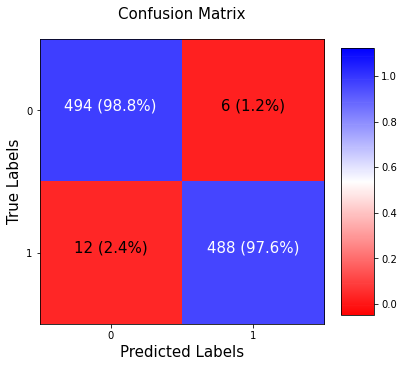

In [173]:
#---- Show Confussion Matrix:
y_pred = model_5.predict(x).round().squeeze()

Plot_CM(y,y_pred)